In [12]:
import tensorflow as tf
import utility
import scipy.misc

In [4]:
model=utility.load_vgg_model('pretrained-model/imagenet-vgg-verydeep-19_1.mat')

conv1_1


In [23]:
import cv2
from PIL import Image
print type(model)
import numpy as np

# imagematrix=cv2.imread('/home/shivam/Neural Net Transfer/content300.jpg')
def resizeimageforinput(path):
    imagematrix=cv2.imread(path)
    arr=scipy.misc.imresize(imagematrix,(300,400))
    expandedarray=np.expand_dims(arr,axis=0)
    img = Image.fromarray(arr, 'RGB')
    img.save('modified.png')
    return expandedarray
# img.show()

<type 'dict'>


In [25]:
imagematrix=resizeimageforinput('/home/shivam/Neural Net Transfer/content300.jpg')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  if __name__ == '__main__':


In [27]:
def visualizefeaturemap(layername):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        sess.run(tf.assign(model['input'],imagematrix))
        featuremaparray=sess.run(model[layername])
        return featuremaparray

In [42]:
array=visualizefeaturemap('conv1_1')
print array.shape

(1, 300, 400, 64)


Original image is 


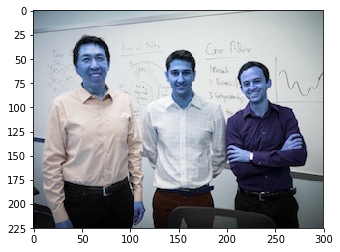

In [60]:
import matplotlib.pyplot as plt
import time
print "Original image is "
plt.imshow(cv2.imread('/home/shivam/Neural Net Transfer/content300.jpg'))

(300, 400, 64)


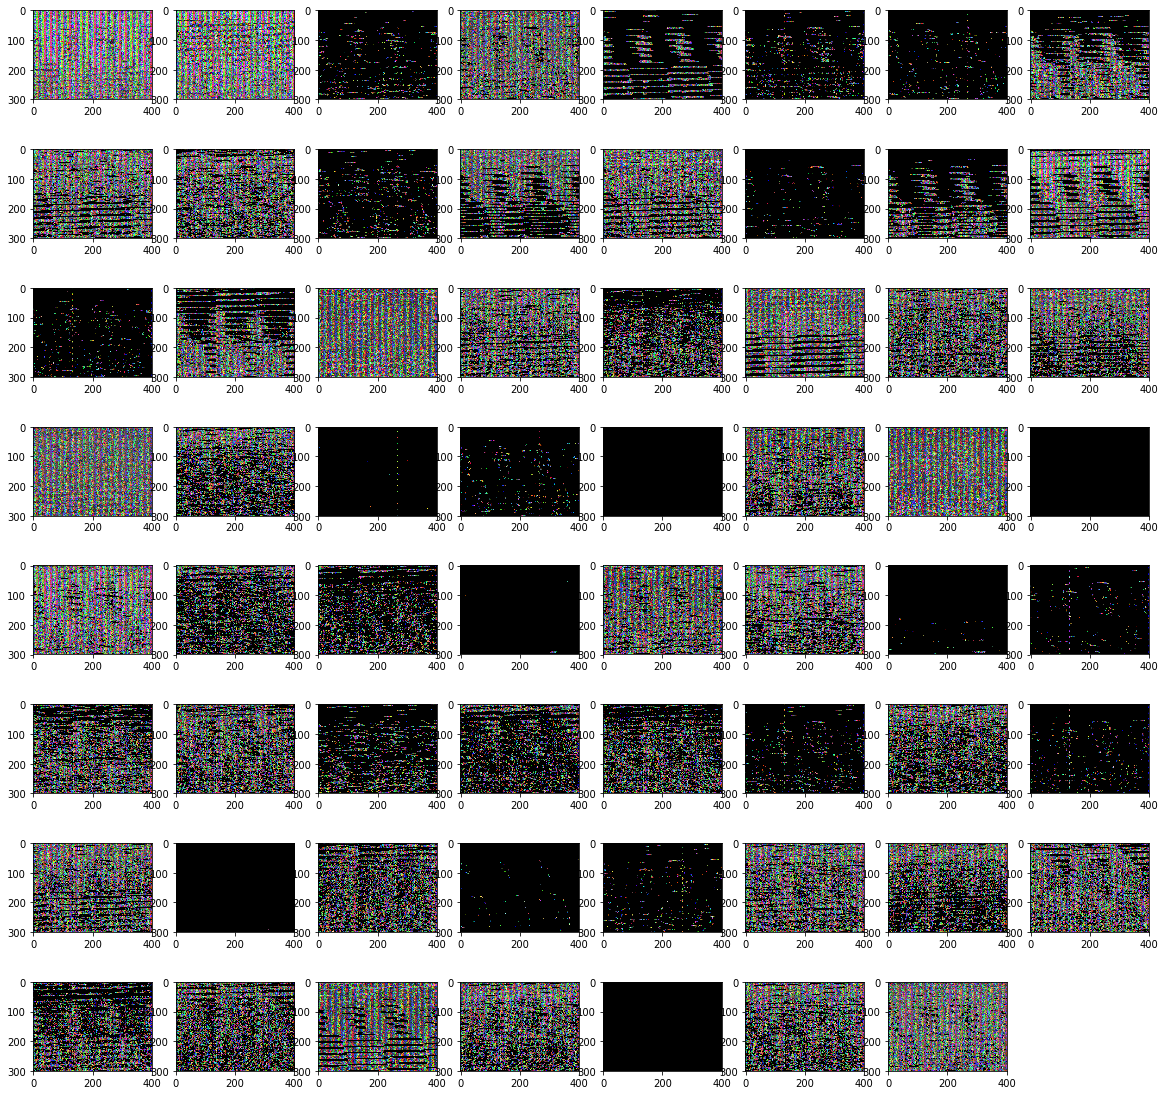

In [57]:
array=np.squeeze(array)
print array.shape
# img=Image.fromarray(array[0][0],'RGB')
# img.save("nre.png")
# np.random.randint()
# for i in range(array.shape[2]):
#     img=Image.fromarray(array[:,:,i],'RGB')
#     plt.imshow(img)
#     time.sleep(0.001)
w=10
h=10
fig=plt.figure(figsize=(20, 20))
columns = 8
rows = 8
for i in range(1, columns*rows +1):
    if i==array.shape[2]:
        break;
    else:    
        img = Image.fromarray(array[:,:,i],'RGB')
        fig.add_subplot(rows, columns, i)
        plt.imshow(img)
plt.show()
